In [46]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.sparse as sparse
from scipy.sparse.linalg import spsolve
import seaborn as sns
import random
import implicit
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
%matplotlib inline

In [2]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [3]:
df=pd.read_excel('Online Retail.xlsx')
len(df)

541909

In [4]:
df = df.loc[pd.isnull(df.CustomerID) == False]
len(df)

406829

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
item_lookup = df[['StockCode', 'Description']].drop_duplicates() 
# Only get unique item/description pairs

In [7]:
item_lookup['StockCode'] = item_lookup.StockCode.astype(str) 
# Encode as strings for future lookup ease

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [10]:
df['CustomerID'] = df.CustomerID.astype(int) 
# Convert to int for customer ID

df = df[['StockCode', 'Quantity', 'CustomerID']] 
# Get rid of unnecessary info

df

,StockCode,Quantity,CustomerID
0,85123A,6,17850
1,71053,6,17850
2,84406B,8,17850
3,84029G,6,17850
4,84029E,6,17850
5,22752,2,17850
6,21730,6,17850
7,22633,6,17850
8,22632,6,17850
9,84879,32,13047


In [11]:
dfg = df.groupby(['CustomerID', 'StockCode']).sum().reset_index() 
# Group together

dfg.Quantity.loc[dfg.Quantity == 0] = 1 
# Replace a sum of zero purchases with a one to indicate purchased

dfg

,CustomerID,StockCode,Quantity
0,12346,23166,1
1,12347,16008,24
2,12347,17021,36
3,12347,20665,6
4,12347,20719,40
5,12347,20780,12
6,12347,20782,6
7,12347,20966,10
8,12347,21035,6
9,12347,21041,12


In [12]:
dfgp = dfg.query('Quantity > 0') 
# Only get customers where purchase totals were positive

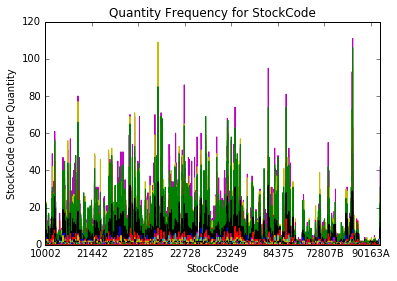

In [13]:
pd.crosstab(dfgp.StockCode,df.Quantity).plot()
plt.title('Quantity Frequency for StockCode')
plt.xlabel('StockCode')
plt.ylabel('StockCode Order Quantity')
plt.gca().legend_.remove();

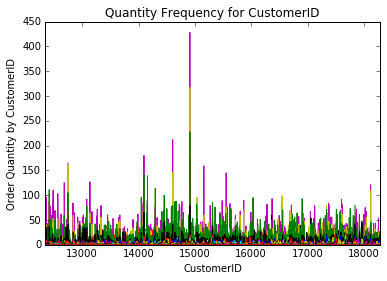

In [14]:
pd.crosstab(dfgp.CustomerID,df.Quantity).plot()
plt.title('Quantity Frequency for CustomerID')
plt.xlabel('CustomerID')
plt.ylabel('Order Quantity by CustomerID')
plt.gca().legend_.remove();

In [15]:
dfgp.head()

,CustomerID,StockCode,Quantity
0,12346,23166,1
1,12347,16008,24
2,12347,17021,36
3,12347,20665,6
4,12347,20719,40


In [16]:
customers = list(np.sort(dfgp.CustomerID.unique())) 
# Get our unique customers

customers

[12346,
 12347,
 12348,
 12349,
 12350,
 12352,
 12353,
 12354,
 12355,
 12356,
 12357,
 12358,
 12359,
 12360,
 12361,
 12362,
 12363,
 12364,
 12365,
 12367,
 12370,
 12371,
 12372,
 12373,
 12374,
 12375,
 12377,
 12378,
 12379,
 12380,
 12381,
 12383,
 12384,
 12386,
 12388,
 12390,
 12391,
 12393,
 12394,
 12395,
 12397,
 12398,
 12399,
 12401,
 12402,
 12403,
 12405,
 12406,
 12407,
 12408,
 12409,
 12410,
 12412,
 12413,
 12414,
 12415,
 12417,
 12418,
 12420,
 12421,
 12422,
 12423,
 12424,
 12425,
 12426,
 12427,
 12428,
 12429,
 12430,
 12431,
 12432,
 12433,
 12434,
 12435,
 12436,
 12437,
 12438,
 12441,
 12442,
 12444,
 12445,
 12446,
 12447,
 12448,
 12449,
 12450,
 12451,
 12452,
 12453,
 12454,
 12455,
 12456,
 12457,
 12458,
 12461,
 12462,
 12463,
 12464,
 12465,
 12468,
 12471,
 12472,
 12473,
 12474,
 12475,
 12476,
 12477,
 12478,
 12479,
 12480,
 12481,
 12483,
 12484,
 12488,
 12489,
 12490,
 12491,
 12492,
 12493,
 12494,
 12497,
 12498,
 12500,
 12501,
 12502,


In [17]:
items = list(dfgp.StockCode.unique()) 
# Get our unique products that were purchased

items

[23166,
 16008,
 17021,
 20665,
 20719,
 20780,
 20782,
 20966,
 21035,
 21041,
 21064,
 21154,
 21171,
 21265,
 21578,
 21636,
 21731,
 21791,
 21832,
 21975,
 21976,
 22131,
 22134,
 22195,
 22196,
 22212,
 22252,
 22371,
 22372,
 22374,
 22375,
 22376,
 22417,
 22422,
 22423,
 22432,
 22492,
 22494,
 22497,
 22550,
 22561,
 22621,
 22697,
 22698,
 22699,
 22725,
 22726,
 22727,
 22728,
 22729,
 22771,
 22772,
 22773,
 22774,
 22775,
 22805,
 22821,
 22945,
 22992,
 23076,
 23084,
 23146,
 23147,
 23162,
 23170,
 23171,
 23172,
 23173,
 23174,
 23175,
 23177,
 23271,
 23297,
 23308,
 23316,
 23420,
 23421,
 23422,
 23480,
 23497,
 23503,
 23506,
 23508,
 23552,
 47580,
 71477,
 84969,
 84991,
 84992,
 85116,
 85178,
 u'47559B',
 u'47567B',
 u'51014C',
 u'84558A',
 u'84559A',
 u'84559B',
 u'84625A',
 u'84625C',
 u'84997B',
 u'84997C',
 u'84997D',
 u'85167B',
 u'85232D',
 21211,
 21213,
 21725,
 21726,
 21967,
 21977,
 21980,
 21981,
 21982,
 21983,
 21985,
 22437,
 22616,
 22951,
 229

In [18]:
quantity = list(dfgp.Quantity) 
# All of our purchases

quantity

[1,
 24,
 36,
 6,
 40,
 12,
 6,
 10,
 6,
 12,
 30,
 10,
 12,
 24,
 6,
 12,
 72,
 48,
 12,
 48,
 48,
 6,
 12,
 48,
 72,
 6,
 12,
 32,
 8,
 16,
 28,
 12,
 48,
 12,
 15,
 6,
 108,
 12,
 12,
 8,
 12,
 12,
 12,
 12,
 24,
 20,
 16,
 36,
 16,
 8,
 12,
 12,
 12,
 24,
 12,
 12,
 12,
 12,
 24,
 240,
 84,
 16,
 12,
 16,
 12,
 12,
 12,
 4,
 4,
 8,
 16,
 16,
 16,
 48,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 40,
 40,
 6,
 6,
 12,
 12,
 72,
 72,
 18,
 12,
 30,
 6,
 12,
 126,
 12,
 12,
 48,
 24,
 6,
 6,
 6,
 30,
 3,
 72,
 144,
 48,
 24,
 144,
 144,
 144,
 144,
 144,
 144,
 144,
 20,
 72,
 72,
 144,
 72,
 200,
 192,
 48,
 144,
 72,
 9,
 6,
 6,
 12,
 16,
 36,
 36,
 3,
 6,
 3,
 6,
 6,
 6,
 24,
 12,
 12,
 6,
 6,
 6,
 12,
 6,
 8,
 1,
 4,
 8,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 6,
 4,
 25,
 3,
 4,
 2,
 6,
 1,
 2,
 2,
 3,
 12,
 6,
 6,
 4,
 12,
 12,
 2,
 8,
 8,
 8,
 8,
 12,
 2,
 10,
 3,
 12,
 6,
 25,
 12,
 12,
 12,
 6,
 4,
 2,
 12,
 6,
 12,
 1,
 3,
 3,
 1,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 24,
 12,
 12,
 1

In [19]:
rows = dfgp.CustomerID.astype('category', categories = customers).cat.codes 
# Get the associated row indices

cols = dfgp.StockCode.astype('category', categories = items).cat.codes 
# Get the associated column indices

purchases_sparse = sparse.csr_matrix((quantity, (rows, cols)), shape=(len(customers), len(items)))

In [20]:
purchases_sparse

<4338x3664 sparse matrix of type '<type 'numpy.int64'>'
	with 266723 stored elements in Compressed Sparse Row format>

In [21]:
matrix_size = purchases_sparse.shape[0]*purchases_sparse.shape[1] 
# Number of possible interactions in the matrix

num_purchases = len(purchases_sparse.nonzero()[0]) 
# Number of items interacted with

num_purchases

266723

In [22]:
sparsity = 100*(1 - (num_purchases/matrix_size))
sparsity

100

In [23]:
def make_train(ratings, pct_test = 0.2):
    test_set = ratings.copy() 
    # Make a copy of the original set to be the test set. 
   
    test_set[test_set != 0] = 1 
    # Store the test set as a binary preference matrix
    
    training_set = ratings.copy() 
    # Make a copy of the original data we can alter as our training set. 
    
    nonzero_inds = training_set.nonzero() 
    # Find the indices in the ratings data where an interaction exists
    
    nonzero_pairs = list(zip(nonzero_inds[0], nonzero_inds[1])) 
    # Zip these pairs together of user,item index into list
    
    random.seed(0) 
    # Set the random seed to zero for reproducibility
    
    num_samples = int(np.ceil(pct_test*len(nonzero_pairs))) 
    # Round the number of samples needed to the nearest integer
    
    samples = random.sample(nonzero_pairs, num_samples) 
    # Sample a random number of user-item pairs without replacement
    
    user_inds = [index[0] for index in samples] 
    # Get the user row indices
    
    item_inds = [index[1] for index in samples] 
    # Get the item column indices
    
    training_set[user_inds, item_inds] = 0 
    # Assign all of the randomly chosen user-item pairs to zero
    
    training_set.eliminate_zeros() 
    # Get rid of zeros in sparse array storage after update to save space
    
    return training_set, test_set, list(set(user_inds)) 
    # Output the unique list of user rows that were altered
    
#This will return our training set, a test set that has been binarized to 0's and 1's for purchase

In [24]:
item_train, item_test, item_users_altered = make_train(purchases_sparse, pct_test = 0.2)

In [25]:
def implicit_weighted_ALS(training_set, lambda_val = 0.1, alpha = 40, iterations = 10, rank_size = 20, seed = 0):
   
    # first set up our confidence matrix
    
    cm = (alpha*training_set) # To allow the matrix to stay sparse, I will add one later when each row is taken 
                                # and converted to dense. 
    num_user = cm.shape[0]
    num_item = cm.shape[1] # Get the size of our original ratings matrix, m x n
    
    # initialize our X/Y feature vectors randomly with a set seed
    rstate = np.random.RandomState(seed)
    
    X = sparse.csr_matrix(rstate.normal(size = (num_user, rank_size))) 
    # Random numbers in a m x rank shape
    
    Y = sparse.csr_matrix(rstate.normal(size = (num_item, rank_size)))
    # Normally this would be rank x n but we can 
    # transpose at the end. Makes calculation more simple.
    
    X_eye = sparse.eye(num_user)
    Y_eye = sparse.eye(num_item)
    lambda_eye = lambda_val * sparse.eye(rank_size) 
    # Our regularization term lambda*I. 
    
    # We can compute this before iteration starts. 
    
    # Begin iterations
   
    for iter_step in range(iterations): 
    # Iterate back and forth between solving X given fixed Y and vice versa
        
        # Compute yTy and xTx at beginning of each iteration to save computing time
        yTy = Y.T.dot(Y)
        xTx = X.T.dot(X)
        # Being iteration to solve for X based on fixed Y
        
        for u in range(num_user):
            cm_samp = cm[u,:].toarray() 
            # Grab user row from confidence matrix and convert to dense
            
            pref = cm_samp.copy() 
            
            pref[pref != 0] = 1 
            # Create binarized preference vector 
            
            CuI = sparse.diags(cm_samp, [0]) 
            # Get Cu - I term, don't need to subtract 1 since we never added it 
            
            yTCuIY = Y.T.dot(CuI).dot(Y) 
            # This is the yT(Cu-I)Y term 
            
            yTCupu = Y.T.dot(CuI + Y_eye).dot(pref.T) 
            # This is the yTCuPu term, where we add the eye back in
            # Cu - I + I = Cu
            
            X[u] = spsolve(yTy + yTCuIY + lambda_eye, yTCupu) 
            # Solve for Xu = ((yTy + yT(Cu-I)Y + lambda*I)^-1)yTCuPu, equation 4 from the paper  
        
        # iteration to solve for Y based on fixed X 
        for i in range(num_item):
            cm_samp = cm[:,i].T.toarray() 
            # transpose to get it in row format and convert to dense
            
            pref = cm_samp.copy()
            
            pref[pref != 0] = 1 
            # Create binarized preference vector
            
            CiI = sparse.diags(cm_samp, [0]) 
            # Get Ci - I term, don't need to subtract 1 since we never added it
            
            xTCiIX = X.T.dot(CiI).dot(X) 
            # This is the xT(Cu-I)X term
            
            xTCiPi = X.T.dot(CiI + X_eye).dot(pref.T) 
            # This is the xTCiPi term
            
            Y[i] = spsolve(xTx + xTCiIX + lambda_eye, xTCiPi)
            # Solve for Yi = ((xTx + xT(Cu-I)X) + lambda*I)^-1)xTCiPi, equation 5 from the paper
    
    return X, Y.T 
        # Transpose at the end to make up for not being transposed at the beginning. 
        # Y needs to be rank x n. Kept these as separate matrices for scale reasons. 

In [26]:
user_vecs, item_vecs = implicit_weighted_ALS(item_train, lambda_val = 0.1, alpha = 15, iterations = 1,
                                            rank_size = 20)

In [27]:
user_vecs[0,:].dot(item_vecs).toarray()[0,:10]

array([  1.07918676e-02,  -2.36591157e-03,   1.11661399e-03,
         7.20475041e-04,   1.38998766e-02,  -6.58783170e-05,
        -4.42846109e-06,  -4.40710519e-04,   4.42446559e-03,
         1.00678268e-03])

In [28]:
alpha = 15
user_vecs, item_vecs = implicit.alternating_least_squares((item_train*alpha).astype('double'), 
                                                          factors=20, 
                                                          regularization = 0.1, 
                                                         iterations = 50)

In [29]:
def auc_score(predictions, test):
    
    fpr, tpr, thresholds = metrics.roc_curve(test, predictions)
    
    return metrics.auc(fpr, tpr)   

In [32]:
def calc_mean_auc(training_set, altered_users, predictions, test_set):
    
    store_auc = [] 
    # An empty list to store the AUC for each user that had an item removed from the training set
    
    popularity_auc = [] 
    # To store popular AUC scores
    
    pop_items = np.array(test_set.sum(axis = 0)).reshape(-1) 
    # Get sum of item iteractions to find most popular
    
    item_vecs = predictions[1]
    
    for user in altered_users: 
    # Iterate through each user that had an item altered
        
        training_row = training_set[user,:].toarray().reshape(-1) 
        # Get the training set row
        
        zero_inds = np.where(training_row == 0) 
        # Find where the interaction had not yet occurred
        # Get the predicted values based on our user/item vectors
        
        user_vec = predictions[0][user,:]
        
        pred = user_vec.dot(item_vecs).toarray()[0,zero_inds].reshape(-1)
        # Get only the items that were originally zero
        # Select all ratings from the MF prediction for this user that originally had no iteraction
        
        actual = test_set[user,:].toarray()[0,zero_inds].reshape(-1) 
        # Select the binarized yes/no interaction pairs from the original full data
        # that align with the same pairs in training 
        
        pop = pop_items[zero_inds] 
        # Get the item popularity for our chosen items
        
        store_auc.append(auc_score(pred, actual)) 
        # Calculate AUC for the given user and store
        
        popularity_auc.append(auc_score(pop, actual)) 
        # Calculate AUC using most popular and store
    
    return float('%.3f'%np.mean(store_auc)), float('%.3f'%np.mean(popularity_auc))  
   # Return the mean AUC rounded to three decimal places for both test and popularity benchmark

In [33]:
calc_mean_auc(item_train, item_users_altered, 
              [sparse.csr_matrix(user_vecs), sparse.csr_matrix(item_vecs.T)], item_test)
# AUC for our recommender system

(0.872, 0.812)

In [35]:
customers_arr = np.array(customers) 
# Array of customer IDs from the ratings matrix

items_arr = np.array(items) 
# Array of product IDs from the ratings matrix

In [36]:
def get_items_purchased(customer_id, mf_train, customers_list, items_list, item_lookup):
    
    cust_ind = np.where(customers_list == customer_id)[0][0] 
    # Returns the index row of our customer id
    
    purchased_ind = mf_train[cust_ind,:].nonzero()[1] 
    # Get column indices of purchased items
    
    item_codes = items_list[purchased_ind] 
    # Get the stock codes for our purchased items
    
    return item_lookup.loc[item_lookup.StockCode.isin(item_codes)]

In [37]:
customers_arr[:25]

array([12346, 12347, 12348, 12349, 12350, 12352, 12353, 12354, 12355,
       12356, 12357, 12358, 12359, 12360, 12361, 12362, 12363, 12364,
       12365, 12367, 12370, 12371, 12372, 12373, 12374], dtype=int64)

In [38]:
items_arr[:25]

array([u'23166', u'16008', u'17021', u'20665', u'20719', u'20780',
       u'20782', u'20966', u'21035', u'21041', u'21064', u'21154',
       u'21171', u'21265', u'21578', u'21636', u'21731', u'21791',
       u'21832', u'21975', u'21976', u'22131', u'22134', u'22195', u'22196'], 
      dtype='<U12')

In [39]:
def rec_items(customer_id, mf_train, user_vecs, item_vecs, customer_list, item_list, item_lookup, num_items = 10):
     
    cust_ind = np.where(customer_list == customer_id)[0][0] 
    # Returns the index row of our customer id
    
    pref_vec = mf_train[cust_ind,:].toarray() 
    # Get the ratings from the training set ratings matrix
    
    pref_vec = pref_vec.reshape(-1) + 1 
    # Add 1 to everything, so that items not purchased yet become equal to 1
    
    pref_vec[pref_vec > 1] = 0 
    # Make everything already purchased zero
    
    rec_vector = user_vecs[cust_ind,:].dot(item_vecs.T) 
    # Get dot product of user vector and all item vectors
    # Scale this recommendation vector between 0 and 1
    
    min_max = MinMaxScaler()
    
    rec_vector_scaled = min_max.fit_transform(rec_vector.reshape(-1,1))[:,0] 
    
    recommend_vector = pref_vec*rec_vector_scaled 
    # Items already purchased have their recommendation multiplied by zero
    
    item_idx = np.argsort(recommend_vector)[::-1][:num_items] 
    # Sort the indices of the items into order 
    # of best recommendations
    
    rec_list = [] # start empty list to store items
    
    for index in item_idx:
        
        code = item_list[index]
        
        rec_list.append([code, item_lookup.Description.loc[item_lookup.StockCode == code].iloc[0]]) 
        # Append our descriptions to the list
    
    codes = [item[0] for item in rec_list]
    
    descriptions = [item[1] for item in rec_list]
    
    final_frame = pd.DataFrame({'StockCode': codes, 'Description': descriptions}) 
    # Create a dataframe 
    
    return final_frame[['StockCode', 'Description']] 
    # Switch order of columns around

In [40]:
get_items_purchased(12372, item_train, customers_arr, items_arr, item_lookup)

,StockCode,Description
32,21791,VINTAGE HEADS AND TAILS CARD GAME
35,22629,SPACEBOY LUNCH BOX
36,22659,LUNCH BOX I LOVE LONDON
37,22631,CIRCUS PARADE LUNCH BOX
42,22540,MINI JIGSAW CIRCUS PARADE
43,22544,MINI JIGSAW SPACEBOY
45,POST,POSTAGE
235,22556,PLASTERS IN TIN CIRCUS PARADE
549,22630,DOLLY GIRL LUNCH BOX
621,20750,RED RETROSPOT MINI CASES


In [41]:
rec_items(12372, item_train, user_vecs, item_vecs, customers_arr, items_arr, item_lookup,
                       num_items = 10)

,StockCode,Description
0,22027,TEA PARTY BIRTHDAY CARD
1,22029,SPACEBOY BIRTHDAY CARD
2,22467,GUMBALL COAT RACK
3,21509,COWBOYS AND INDIANS BIRTHDAY CARD
4,22716,CARD CIRCUS PARADE
5,22046,TEA PARTY WRAPPING PAPER
6,22037,ROBOT BIRTHDAY CARD
7,22025,RING OF ROSES BIRTHDAY CARD
8,21508,VINTAGE KID DOLLY CARD
9,22708,WRAP DOLLY GIRL


In [42]:
get_items_purchased(12356, item_train, customers_arr, items_arr, item_lookup)

,StockCode,Description
96,21212,PACK OF 72 RETROSPOT CAKE CASES
99,84991,60 TEATIME FAIRY CAKE CASES
134,22646,CERAMIC STRAWBERRY CAKE MONEY BANK
209,22195,LARGE HEART MEASURING SPOONS
226,21086,SET/6 RED SPOTTY PAPER CUPS
347,21122,SET/10 PINK POLKADOT PARTY CANDLES
352,22435,SET OF 9 HEART SHAPED BALLOONS
394,21125,SET 6 FOOTBALL CELEBRATION CANDLES
403,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS
404,84378,SET OF 3 HEART COOKIE CUTTERS


In [43]:
rec_items(12356, item_train, user_vecs, item_vecs, customers_arr, items_arr, item_lookup,
                       num_items = 10)

,StockCode,Description
0,21126,SET OF 6 GIRLS CELEBRATION CANDLES
1,22644,CERAMIC CHERRY CAKE MONEY BANK
2,37495,FAIRY CAKE BIRTHDAY CANDLE SET
3,84520B,PACK 20 ENGLISH ROSE PAPER NAPKINS
4,POST,POSTAGE
5,21358,TOAST ITS - HAPPY BIRTHDAY
6,21114,LAVENDER SCENTED FABRIC HEART
7,22128,PARTY CONES CANDY ASSORTED
8,22851,SET 20 NAPKINS FAIRY CAKES DESIGN
9,22957,SET 3 PAPER VINTAGE CHICK PAPER EGG


In [44]:
get_items_purchased(12360, item_train, customers_arr, items_arr, item_lookup)

,StockCode,Description
5,22752,SET 7 BABUSHKA NESTING BOXES
34,22326,ROUND SNACK BOXES SET OF4 WOODLAND
44,22492,MINI PAINT SET VINTAGE
45,POST,POSTAGE
90,84997B,RED 3 PIECE RETROSPOT CUTLERY SET
91,84997C,BLUE 3 PIECE POLKADOT CUTLERY SET
92,21094,SET/6 RED SPOTTY PAPER PLATES
94,21559,STRAWBERRY LUNCH BOX WITH CUTLERY
136,22438,BALLOON ART MAKE YOUR OWN FLOWERS
224,21080,SET/20 RED RETROSPOT PAPER NAPKINS


In [45]:
rec_items(12360, item_train, user_vecs, item_vecs, customers_arr, items_arr, item_lookup,
                       num_items = 10)

,StockCode,Description
0,23310,BUBBLEGUM RING ASSORTED
1,23368,SET 12 COLOUR PENCILS DOLLY GIRL
2,22820,GIFT BAG BIRTHDAY
3,22466,FAIRY TALE COTTAGE NIGHTLIGHT
4,22610,PENS ASSORTED FUNNY FACE
5,23389,SPACEBOY MINI BACKPACK
6,22964,3 PIECE SPACEBOY COOKIE CUTTER SET
7,23367,SET 12 COLOUR PENCILS SPACEBOY
8,23078,ICE CREAM PEN LIP GLOSS
9,22367,CHILDRENS APRON SPACEBOY DESIGN
